## Gerekli Kütüphane ve Fonksiyonlar

In [37]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,mean_squared_error, r2_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

### Şeker hastalığı tahmini

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Model ve Tahmin

In [4]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [7]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
loj_model = LogisticRegression(solver = "liblinear").fit(X,y)

In [10]:
loj_model.intercept_

array([-5.89249766])

In [11]:
loj_model.coef_

array([[ 1.17061865e-01,  2.83893855e-02, -1.68880903e-02,
         7.55635388e-04, -6.42919999e-04,  5.97757973e-02,
         6.77489484e-01,  7.24167534e-03]])

In [12]:
 loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [13]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [14]:
y_pred =  loj_model.predict(X)

In [15]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]])

In [16]:
accuracy_score(y, y_pred)

0.7747395833333334

In [19]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [20]:
loj_model.predict_proba(X)[0:10] # olasılıksal hesaplama

array([[0.35038581, 0.64961419],
       [0.91703384, 0.08296616],
       [0.22474952, 0.77525048],
       [0.92140079, 0.07859921],
       [0.16726037, 0.83273963],
       [0.79899939, 0.20100061],
       [0.88020685, 0.11979315],
       [0.27812564, 0.72187436],
       [0.32058587, 0.67941413],
       [0.92275333, 0.07724667]])

In [32]:
y_pred_prob = loj_model.predict_proba(X)
y_pred = (y_pred_prob[:, 1] >= 0.5).astype(int)
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7747395833333334


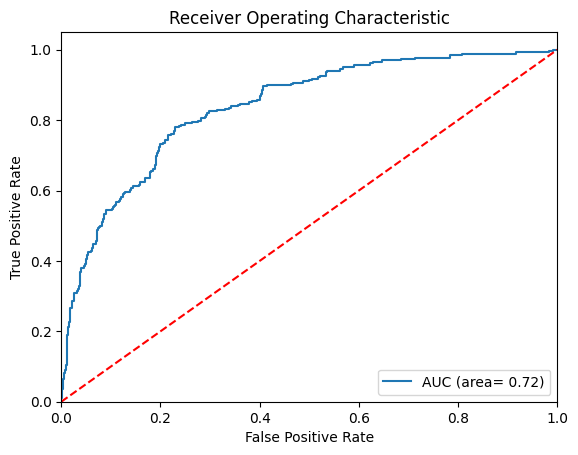

In [33]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = "AUC (area= %0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

## Model Tuning (Model Doğrulama)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [35]:
loj_model = LogisticRegression(solver="liblinear").fit(X_train, y_train)

In [36]:
y_pred = loj_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7532467532467533


In [40]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7748188405797102